# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import altair as alt 
df = pd.read_csv("data26885_8.csv")
df.head(n = 2)

,index,court,date,case_kind,case_num,judge,jail,week,laws,'crime_1','crime_11','crime_13','crime_135','crime_138','crime_14','crime_140','crime_175','crime_18','crime_185','crime_185-1','crime_185-4','crime_2','crime_20','crime_210','crime_216','crime_217','crime_219','crime_276','crime_277','crime_284','crime_3','crime_305','crime_309','crime_320','crime_321','crime_354','crime_38','crime_38-1','crime_41','crime_42',...,'suit_159-4','suit_199','suit_229','suit_273-1','suit_273-2','suit_284-1','suit_299','suit_300','suit_310-2','suit_449','suit_452','suit_454','suit_455-2','suit_455-4','traf_86',changhua,chiayi,hsinchu,hualien,kaohsiung,keelung,kinmen,miaoli,nantou,newTaipei,penghu,pingtung,quaotou,shilin,taichung,tainan,taipei,taitung,taoyuan,yilan,yunlin,alcohol,vehicle,crime_nums,re_crime
0,南投_2019-01-02_投交簡_576.txt,nantou,2019/1/2,投交簡,576,孫于淦,2,1,"'suit_449', 'suit_454', 'crime_185-3', 'crime_...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.075,v_motor,NaN,0
1,南投_2019-01-07_埔交簡_2.txt,nantou,2019/1/7,埔交簡,2,孫于淦,3,2,"'suit_449', 'suit_454', 'crime_185-3', 'crime_41'",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.540,v_truck,NaN,0


In [ ]:
df['court'] = df['court'].astype("category")
df['judge'] = df['judge'].astype("category")
df['vehicle'] = df['vehicle'].astype("category")

In [ ]:
zz = pd.DataFrame.to_numpy(df['\'suit_284-1\'']) 
zzz = pd.DataFrame.to_numpy(df[' \'suit_284-1\'']) 
zzzz = zz+zzz

In [ ]:
df['\'suit_284-1\'']=pd.Series(zzzz)

In [ ]:
df.drop(columns=[' \'suit_284-1\''], inplace=True)

In [ ]:
df.drop(columns=['\'crime_185-3\''], inplace=True)

In [ ]:
df = pd.get_dummies(data = df, columns=["vehicle"]) 

In [ ]:
for i in df[df['re_crime']==0].index:
  df["crime_nums"][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df["total_crime_nums"] = df["crime_nums"]

In [ ]:
df = df.fillna({"total_crime_nums":0})

In [ ]:
for i in df[df['re_crime']==1].index:
  if df['total_crime_nums'][i] == 0:
    df['total_crime_nums'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['total_crime_nums'] = df['total_crime_nums'] + 1

In [ ]:
df['total_crime_nums']

0        1.0
1        1.0
2        1.0
3        2.0
4        3.0
        ... 
26880    5.0
26881    6.0
26882    2.0
26883    2.0
26884    2.0
Name: total_crime_nums, Length: 26885, dtype: float64

In [ ]:
df.head(n=2)

,index,court,date,case_kind,case_num,judge,jail,week,laws,'crime_1','crime_11','crime_13','crime_135','crime_138','crime_14','crime_140','crime_175','crime_18','crime_185','crime_185-1','crime_185-4','crime_2','crime_20','crime_210','crime_216','crime_217','crime_219','crime_276','crime_277','crime_284','crime_3','crime_305','crime_309','crime_320','crime_321','crime_354','crime_38','crime_38-1','crime_41','crime_42',...,'suit_284-1','suit_299','suit_300','suit_310-2','suit_449','suit_452','suit_454','suit_455-2','suit_455-4','traf_86',changhua,chiayi,hsinchu,hualien,kaohsiung,keelung,kinmen,miaoli,nantou,newTaipei,penghu,pingtung,quaotou,shilin,taichung,tainan,taipei,taitung,taoyuan,yilan,yunlin,alcohol,crime_nums,re_crime,vehicle_v_Lcar,vehicle_v_car,vehicle_v_elebike,vehicle_v_motor,vehicle_v_truck,total_crime_nums
0,南投_2019-01-02_投交簡_576.txt,nantou,2019/1/2,投交簡,576,孫于淦,2,1,"'suit_449', 'suit_454', 'crime_185-3', 'crime_...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.075,0.0,0,0,0,0,1,0,1.0
1,南投_2019-01-07_埔交簡_2.txt,nantou,2019/1/7,埔交簡,2,孫于淦,3,2,"'suit_449', 'suit_454', 'crime_185-3', 'crime_41'",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.540,0.0,0,0,0,0,0,1,1.0


In [ ]:
df['total_crime_nums'].isnull().sum(axis = 0)

0

In [ ]:
df.drop(columns=['week'], inplace=True)

In [ ]:
df.drop(columns=['crime_nums'], inplace=True)

In [ ]:
df.drop(columns=['re_crime'], inplace=True)

In [ ]:
df.to_csv('data26885_8_cleaned.csv', encoding='utf-8-sig', index = False)

# Data Visualization

In [ ]:
import numpy as np
import pandas as pd
import altair as alt 
df = pd.read_csv("data26885_8_cleaned.csv")

In [ ]:
df.drop(columns=['laws'], inplace=True)

In [ ]:
df.head(n=1)

,index,court,date,case_kind,case_num,judge,jail,'crime_1','crime_11','crime_13','crime_135','crime_138','crime_14','crime_140','crime_175','crime_18','crime_185','crime_185-1','crime_185-4','crime_2','crime_20','crime_210','crime_216','crime_217','crime_219','crime_276','crime_277','crime_284','crime_3','crime_305','crime_309','crime_320','crime_321','crime_354','crime_38','crime_38-1','crime_41','crime_42','crime_44','crime_47',...,'suit_273-1','suit_273-2','suit_284-1','suit_299','suit_300','suit_310-2','suit_449','suit_452','suit_454','suit_455-2','suit_455-4','traf_86',changhua,chiayi,hsinchu,hualien,kaohsiung,keelung,kinmen,miaoli,nantou,newTaipei,penghu,pingtung,quaotou,shilin,taichung,tainan,taipei,taitung,taoyuan,yilan,yunlin,alcohol,vehicle_v_Lcar,vehicle_v_car,vehicle_v_elebike,vehicle_v_motor,vehicle_v_truck,total_crime_nums
0,南投_2019-01-02_投交簡_576.txt,nantou,2019/1/2,投交簡,576,孫于淦,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.075,0,0,0,1,0,1.0


In [ ]:
df.iloc[:,0:6].columns

Index(['index', 'court', 'date', 'case_kind', 'case_num', 'judge'], dtype='object')

In [ ]:
df.iloc[:,124:131].columns

Index(['alcohol', 'vehicle_v_Lcar', 'vehicle_v_car', 'vehicle_v_elebike',
       'vehicle_v_motor', 'vehicle_v_truck', 'total_crime_nums'],
      dtype='object')

In [ ]:
df.iloc[:,103:124].columns

Index(['changhua', 'chiayi', 'hsinchu', 'hualien', 'kaohsiung', 'keelung',
       'kinmen', 'miaoli', 'nantou', 'newTaipei', 'penghu', 'pingtung',
       'quaotou', 'shilin', 'taichung', 'tainan', 'taipei', 'taitung',
       'taoyuan', 'yilan', 'yunlin'],
      dtype='object')

In [ ]:
df.iloc[:,7:56].columns

Index([' 'crime_1'', ' 'crime_11'', ' 'crime_13'', ' 'crime_135'',
       ' 'crime_138'', ' 'crime_14'', ' 'crime_140'', ' 'crime_175'',
       ' 'crime_18'', ' 'crime_185'', ' 'crime_185-1'', ' 'crime_185-4'',
       ' 'crime_2'', ' 'crime_20'', ' 'crime_210'', ' 'crime_216'',
       ' 'crime_217'', ' 'crime_219'', ' 'crime_276'', ' 'crime_277'',
       ' 'crime_284'', ' 'crime_3'', ' 'crime_305'', ' 'crime_309'',
       ' 'crime_320'', ' 'crime_321'', ' 'crime_354'', ' 'crime_38'',
       ' 'crime_38-1'', ' 'crime_41'', ' 'crime_42'', ' 'crime_44'',
       ' 'crime_47'', ' 'crime_50'', ' 'crime_51'', ' 'crime_54'',
       ' 'crime_55'', ' 'crime_57'', ' 'crime_59'', ' 'crime_61'',
       ' 'crime_62'', ' 'crime_71'', ' 'crime_74'', ' 'crime_75-1'',
       ' 'crime_8'', ' 'crime_89'', ' 'crime_92'', ' 'crime_93'',
       ' 'crime_95''],
      dtype='object')

In [ ]:
df.iloc[:,56:103].columns

Index([' 'gun_14'', ' 'kid_112'', ' 'suit_159'', ' 'suit_159-1'',
       ' 'suit_159-5'', ' 'suit_185-3'', ' 'suit_273-1'', ' 'suit_299'',
       ' 'suit_3'', ' 'suit_3-2'', ' 'suit_300'', ' 'suit_301'', ' 'suit_303'',
       ' 'suit_307'', ' 'suit_310-1'', ' 'suit_310-2'', ' 'suit_41'',
       ' 'suit_449'', ' 'suit_450'', ' 'suit_451-1'', ' 'suit_452'',
       ' 'suit_454'', ' 'suit_455'', ' 'suit_455-1'', ' 'suit_455-10'',
       ' 'suit_455-11'', ' 'suit_455-2'', ' 'suit_455-4'', ' 'suit_455-5'',
       ' 'suit_455-8'', ' 'suit_47'', ' 'traf_86'', ''suit_159-4'',
       ''suit_199'', ''suit_229'', ''suit_273-1'', ''suit_273-2'',
       ''suit_284-1'', ''suit_299'', ''suit_300'', ''suit_310-2'',
       ''suit_449'', ''suit_452'', ''suit_454'', ''suit_455-2'',
       ''suit_455-4'', ''traf_86''],
      dtype='object')

### Descriptive Plot

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.X('vote_average:Q', bin=alt.BinParams(maxbins=50)),
    alt.Y('count()')
).properties(
    width = 500,
    height = 300
)

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.X('jail:Q', bin=alt.BinParams(maxbins=20)),
    alt.Y('count()')
).properties(
    width = 500,
    height = 300
)

### A series of Correlation Heatmap

In [ ]:
df_corr = df.iloc[:,5:56].corr().stack().reset_index().rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'})
df_corr['correlation_label'] = df_corr['correlation'].map('{:.2f}'.format)
df_corr

In [ ]:
base = alt.Chart(df_corr).encode(
    x='variable2:O',
    y='variable:O'    
)

# Text layer with correlation labels
# Colors are for easier readability
text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black')
    )
)

# The correlation heatmap itself
cor_plot = base.mark_rect().encode(
    color='correlation:Q'
).properties(
    width = 1500,
    height = 1500
)

cor_plot + text

alt.LayerChart(...)

In [ ]:
df_suit = df.iloc[:,57:103]
df_suit['jail'] = df['jail']

In [ ]:
df_corr = df_suit.corr().stack().reset_index().rename(columns={0: 'correlation', 'level_0': 'variable', 'level_1': 'variable2'})
df_corr['correlation_label'] = df_corr['correlation'].map('{:.2f}'.format)
df_corr

In [ ]:
base = alt.Chart(df_corr).encode(
    x='variable2:O',
    y='variable:O'    
)

# Text layer with correlation labels
# Colors are for easier readability
text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black')
    )
)

# The correlation heatmap itself
cor_plot = base.mark_rect().encode(
    color='correlation:Q'
).properties(
    width = 1500,
    height = 1500
)

cor_plot + text

alt.LayerChart(...)

In [ ]:
df_states = df.iloc[:,103:124]

In [ ]:
df_corr = df_states.corrwith(df['jail']).reset_index().rename(columns={0: 'correlation'})
df_corr['correlation_label'] = df_corr['correlation'].map('{:.2f}'.format)
df_corr

,index,correlation,correlation_label
0,changhua,0.005639,0.01
1,chiayi,-0.006102,-0.01
2,hsinchu,-0.016601,-0.02
3,hualien,-0.038601,-0.04
4,kaohsiung,0.054868,0.05
5,keelung,-0.020577,-0.02
6,kinmen,0.017887,0.02
7,miaoli,0.059019,0.06
8,nantou,0.050994,0.05
9,newTaipei,-0.094585,-0.09


In [ ]:
df_others = df.iloc[:,124:131]

In [ ]:
df_corr = df_others.corrwith(df['jail']).reset_index().rename(columns={0: 'correlation'})
df_corr['correlation_label'] = df_corr['correlation'].map('{:.2f}'.format)
df_corr

,index,correlation,correlation_label
0,alcohol,0.204237,0.20
1,vehicle_v_Lcar,0.005496,0.01
2,vehicle_v_car,-0.009285,-0.01
3,vehicle_v_elebike,-0.041694,-0.04
4,vehicle_v_motor,0.015632,0.02
5,vehicle_v_truck,0.015580,0.02
6,total_crime_nums,0.587555,0.59


# Lasso Regression

In [ ]:
import numpy as np
import pandas as pd
import altair as alt 
import matplotlib.pyplot as plt
df = pd.read_csv("data26885_8_cleaned.csv")
df.drop(columns = ["index", "court", "date", "case_num", "judge", "laws", "case_kind"], inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,jail,'crime_1','crime_11','crime_13','crime_135','crime_138','crime_14','crime_140','crime_175','crime_18','crime_185','crime_185-1','crime_185-4','crime_2','crime_20','crime_210','crime_216','crime_217','crime_219','crime_276','crime_277','crime_284','crime_3','crime_305','crime_309','crime_320','crime_321','crime_354','crime_38','crime_38-1','crime_41','crime_42','crime_44','crime_47','crime_50','crime_51','crime_54','crime_55','crime_57','crime_59',...,'suit_273-1','suit_273-2','suit_284-1','suit_299','suit_300','suit_310-2','suit_449','suit_452','suit_454','suit_455-2','suit_455-4','traf_86',changhua,chiayi,hsinchu,hualien,kaohsiung,keelung,kinmen,miaoli,nantou,newTaipei,penghu,pingtung,quaotou,shilin,taichung,tainan,taipei,taitung,taoyuan,yilan,yunlin,alcohol,vehicle_v_Lcar,vehicle_v_car,vehicle_v_elebike,vehicle_v_motor,vehicle_v_truck,total_crime_nums
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.075,0,0,0,1,0,1.0
1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.540,0,0,0,0,1,1.0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.290,0,1,0,0,0,1.0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.250,0,0,0,1,0,2.0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.430,0,0,0,1,0,3.0


In [ ]:
x = df.drop(columns = ["jail"])
y = df['jail']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 48)

In [ ]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 0, fit_intercept = True, normalize = True)
lasso_fitted = lasso.fit(x_train, y_train)
y_hat_train = lasso_fitted.predict(x_train)
y_hat_test = lasso_fitted.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 1.07
  + coefficient of determination: 0.62
Performance on Testing Data
  + mean squared error: 1.16
  + coefficient of determination: 0.59


In [ ]:
from sklearn import linear_model
alphas_grid = np.logspace(-1, -7, num = 100)
lasso_cv = linear_model.LassoCV(alphas = alphas_grid, fit_intercept = True, normalize = True, max_iter = 1000, tol = 0.001, cv = 10, random_state = 48)

In [ ]:
lasso_cv_fitted = lasso_cv.fit(x_train, y_train)

In [ ]:
alpha_best = lasso_cv_fitted.alpha_
alpha_best

4.641588833612772e-05

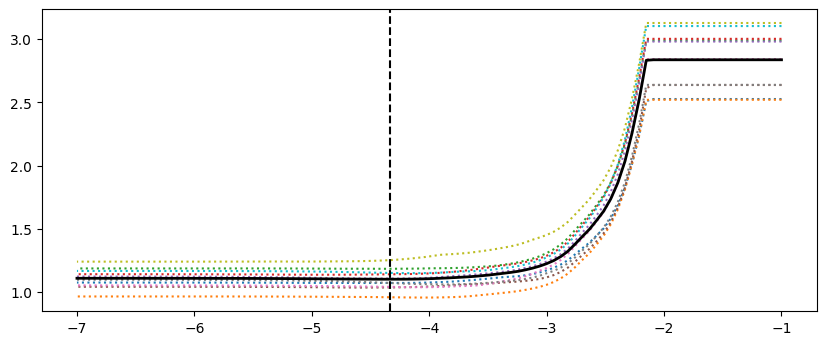

In [ ]:
log_alphas_grid = np.log10(lasso_cv_fitted.alphas_)
ax = plt.figure(figsize = (10, 4), dpi = 100)
ax = plt.plot(log_alphas_grid, lasso_cv_fitted.mse_path_, ':')
ax = plt.plot(log_alphas_grid, lasso_cv_fitted.mse_path_.mean(axis = -1), 'k', label = 'Average across the folds', linewidth = 2)
ax = plt.axvline(np.log10(alpha_best), linestyle = '--', color = 'k', label = 'alpha: CV estimate')

In [ ]:
lasso = linear_model.Lasso(alpha = alpha_best, fit_intercept = True, normalize = True)

In [ ]:
lasso_fitted = lasso.fit(x_train, y_train)

In [ ]:
y_hat_train = lasso_fitted.predict(x_train)
y_hat_test = lasso_fitted.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 1.08
  + coefficient of determination: 0.62
Performance on Testing Data
  + mean squared error: 1.15
  + coefficient of determination: 0.60


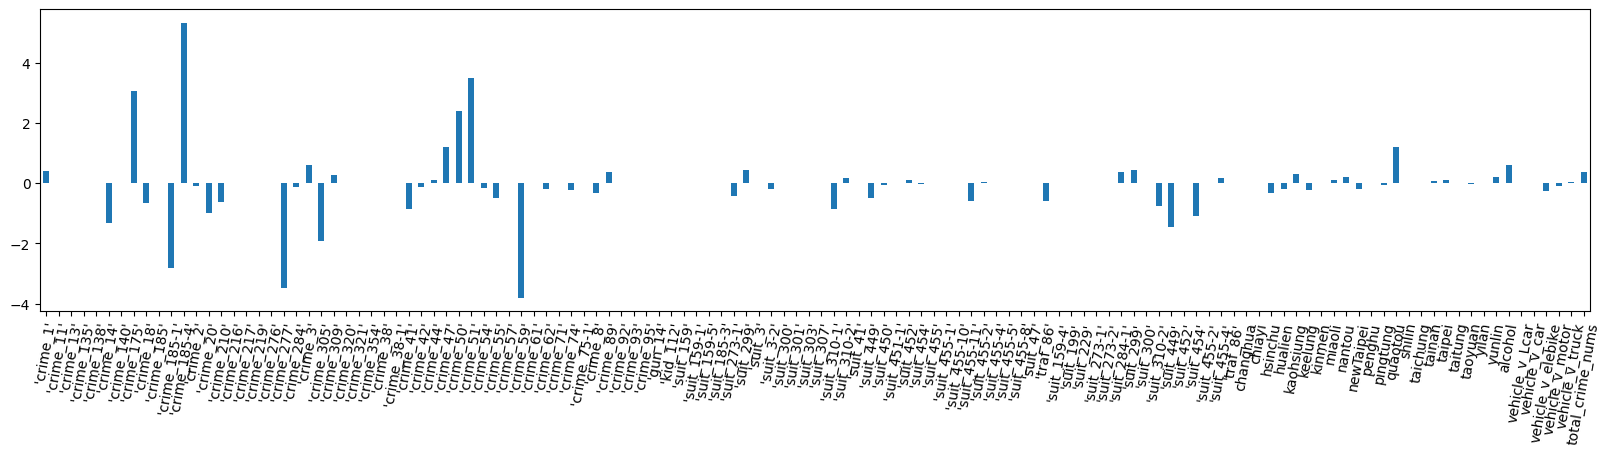

In [ ]:
plt.figure(figsize=(20, 4), dpi = 100)
ax = pd.Series(lasso_fitted.coef_, index=x.columns).plot.bar(rot = 80)

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.X("court:N"),
    alt.Y("average(jail):Q")

).properties(
    width=400,
    height=400
)

In [ ]:
df_qt = df[df['quaotou']==1]
df_qt

In [ ]:
alt.Chart(df_qt).mark_bar().encode(
    alt.X("jail", type='quantitative'),
    alt.Y("count()")

).properties(
    width=400,
    height=400
)

alt.Chart(...)

### LASSO Regression (Pratical Ver.)

In [ ]:
x = df[['alcohol','vehicle_v_Lcar','vehicle_v_car','vehicle_v_elebike','vehicle_v_motor','vehicle_v_truck','total_crime_nums']]
y = df['jail']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 48)

In [ ]:
from sklearn import linear_model
alphas_grid = np.logspace(-1, -7, num = 100)
lasso_cv = linear_model.LassoCV(alphas = alphas_grid, fit_intercept = True, normalize = True, max_iter = 1000, tol = 0.001, cv = 10, random_state = 48)

In [ ]:
lasso_cv_fitted = lasso_cv.fit(x_train, y_train)

In [ ]:
alpha_best = lasso_cv_fitted.alpha_
alpha_best

1e-05

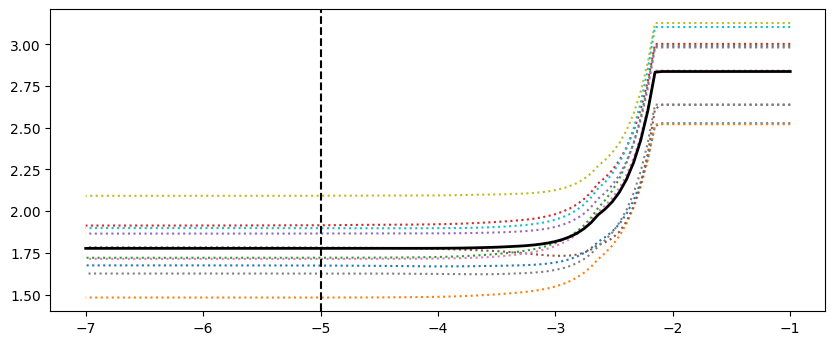

In [ ]:
log_alphas_grid = np.log10(lasso_cv_fitted.alphas_)
ax = plt.figure(figsize = (10, 4), dpi = 100)
ax = plt.plot(log_alphas_grid, lasso_cv_fitted.mse_path_, ':')
ax = plt.plot(log_alphas_grid, lasso_cv_fitted.mse_path_.mean(axis = -1), 'k', label = 'Average across the folds', linewidth = 2)
ax = plt.axvline(np.log10(alpha_best), linestyle = '--', color = 'k', label = 'alpha: CV estimate')

In [ ]:
lasso = linear_model.Lasso(alpha = alpha_best, fit_intercept = True, normalize = True)

In [ ]:
lasso_fitted = lasso.fit(x_train, y_train)

In [ ]:
y_hat_train = lasso_fitted.predict(x_train)
y_hat_test = lasso_fitted.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 1.77
  + coefficient of determination: 0.38
Performance on Testing Data
  + mean squared error: 1.73
  + coefficient of determination: 0.40


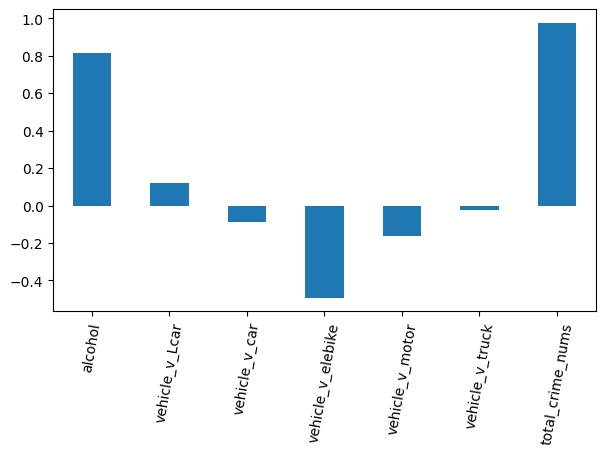

In [ ]:
plt.figure(figsize=(7, 4), dpi = 100)
ax = pd.Series(lasso_fitted.coef_, index=x.columns).plot.bar(rot = 80)

# Tree-based Method

### Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion = "mse", max_depth=10, 
                             min_samples_split=10, min_samples_leaf=5, 
                             random_state=48)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=48, splitter='best')

In [ ]:
y_hat_train = dtr.predict(x_train)
y_hat_test = dtr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 0.88
  + coefficient of determination: 0.69
Performance on Testing Data
  + mean squared error: 1.06
  + coefficient of determination: 0.63


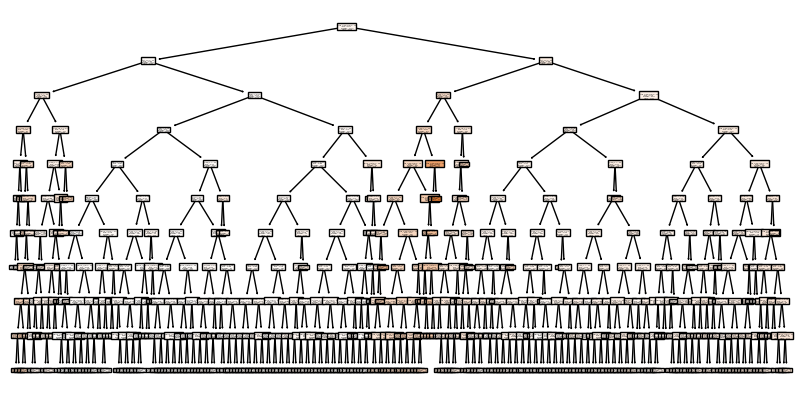

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 5), dpi = 100)
plot_tree(dtr, feature_names = x.columns, filled = True)
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(criterion='mse', max_depth = 6, 
                             n_estimators = 200, max_features = "auto",
                             random_state = 48)
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=48, verbose=0, warm_start=False)

In [ ]:
y_hat_train = rfr.predict(x_train)
y_hat_test = rfr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 0.92
  + coefficient of determination: 0.68
Performance on Testing Data
  + mean squared error: 1.03
  + coefficient of determination: 0.64


# Neural Network

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras

In [ ]:
df = pd.read_csv("data26885_8_cleaned.csv")
df.drop(columns = ["index", "court", "date", "case_num", "judge", "laws", "case_kind"], inplace=True)
df = df.dropna()
x = df.drop(columns = ["jail"])
y = df['jail']

In [ ]:
x = df.drop(columns = ["jail"])
y = df['jail']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 48)

In [ ]:
x_train.shape

(21500, 124)

In [ ]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(21500,124)),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 21500, 100)        12500     
_________________________________________________________________
dense_23 (Dense)             (None, 21500, 10)         1010      
_________________________________________________________________
dense_24 (Dense)             (None, 21500, 1)          11        
Total params: 13,521
Trainable params: 13,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose = 1
)

Epoch 1/20
672/672 [==============================] - 3s 4ms/step - loss: 1.4852 - mse: 1.4852 - val_loss: 1.1492 - val_mse: 1.1492
Epoch 2/20
672/672 [==============================] - 2s 4ms/step - loss: 1.1178 - mse: 1.1178 - val_loss: 1.1325 - val_mse: 1.1325
Epoch 3/20
672/672 [==============================] - 2s 4ms/step - loss: 1.0870 - mse: 1.0870 - val_loss: 1.1258 - val_mse: 1.1258
Epoch 4/20
672/672 [==============================] - 2s 4ms/step - loss: 1.0717 - mse: 1.0717 - val_loss: 1.0777 - val_mse: 1.0777
Epoch 5/20
672/672 [==============================] - 2s 4ms/step - loss: 1.0450 - mse: 1.0450 - val_loss: 1.1664 - val_mse: 1.1664
Epoch 6/20
672/672 [==============================] - 2s 4ms/step - loss: 1.0286 - mse: 1.0286 - val_loss: 1.0568 - val_mse: 1.0568
Epoch 7/20
672/672 [==============================] - 2s 4ms/step - loss: 1.0035 - mse: 1.0035 - val_loss: 1.0444 - val_mse: 1.0444
Epoch 8/20
672/672 [==============================] - 2s 4ms/step - loss: 0.

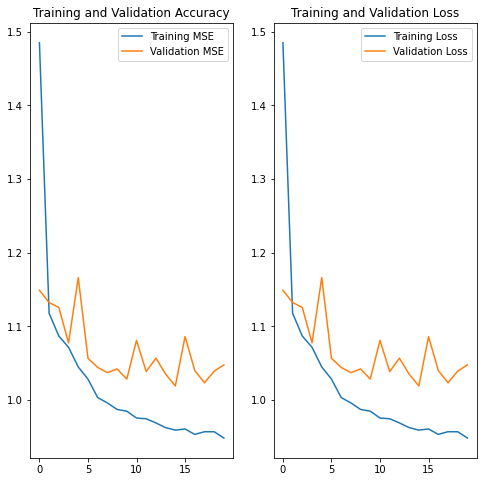

In [ ]:
acc = history.history['mse']
val_acc = history.history['val_mse']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training MSE')
plt.plot(epochs_range, val_acc, label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()